In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import joblib

그래픽카드 인식 확인  
['0.Leonardite(연갈탄)', '1.Lignite(갈탄)', '2.Charcoal(목탄)', '3.Waste(폐경석)']  
라벨값은 한글 제거를 위하여 바꿀것이므로 미리 적어놓았다

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16222031960148306862
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4851040256
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13328208220961234836
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [3]:
path="D:\Image_data"

In [4]:
labels = os.listdir(path)

In [5]:
labels

['0', '1', '2', '3']

**폴더를 하나씩 돌며 이미지를 읽어보면 원래 픽셀 값(4032, 3024)로 읽어들일시 첫번째 폴더를 읽지 못하고 메모리가 터짐**  
OpenCV(4.5.1) ..\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 36578304 bytes in function 'cv::OutOfMemoryError'

In [7]:
### (32, 32)픽셀로 읽어 들이는데 19분
### 픽셀값 변경을 원할떄만 실행시키며 그렇지 않은 경우 아래의 joblib을 이용하여 가져올 것, 실행시간: 5초 이하
img_list=np.array([])
label_list=[]
for i in os.listdir(path):
    print("Progressing...")
    for j in os.listdir(os.path.join(path, i)):
        img = cv2.imread(os.path.join(path, i, j))
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
        img = np.float32(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list = np.append(img_list, img)
        label_list.append(i)

Progressing...
Progressing...
Progressing...
Progressing...


In [11]:
img_list = img_list/255.0

In [13]:
img_list = np.reshape(img_list, (-1, 32, 32, 3))

In [15]:
joblib.dump(img_list, "CV2_float32.pkl")

['CV2_float32.pkl']

In [ ]:
### (32, 32)픽셀로 읽어 들이는데 19분
### 픽셀값 변경을 원할떄만 실행시키며 그렇지 않은 경우 아래의 joblib을 이용하여 가져올 것, 실행시간: 5초 이하
img_list=np.array([])
label_list=[]
for i in os.listdir(path):
    print("Progressing...")
    for j in os.listdir(os.path.join(path, i)):
        img = cv2.imread(os.path.join(path, i, j))
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
        img = np.float32(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list = np.append(img_list, img)
        label_list.append(i)

In [37]:
### (32, 32)픽셀로 읽어 들이는데 19분
### 픽셀값 변경을 원할떄만 실행시키며 그렇지 않은 경우 아래의 joblib을 이용하여 가져올 것, 실행시간: 5초 이하
img_list=np.array([])
label_list=[]
for i in os.listdir(path):
    print("Progressing...")
    for j in os.listdir(os.path.join(path, i)):
        img = cv2.imread(os.path.join(path, i, j))
        print(j)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
        img = np.float32(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list = np.append(img_list, img)
        label_list.append(i)

Progressing...
Leonardite (1).jpg
Leonardite (10).jpg
Leonardite (100).jpg
Leonardite (101).jpg
Leonardite (102).jpg
Leonardite (103).jpg
Leonardite (104).jpg
Leonardite (105).jpg
Leonardite (106).jpg
Leonardite (107).jpg
Leonardite (108).jpg
Leonardite (109).jpg
Leonardite (11).jpg
Leonardite (110).jpg
Leonardite (111).jpg
Leonardite (112).jpg
Leonardite (113).jpg
Leonardite (114).jpg
Leonardite (115).jpg


KeyboardInterrupt: 

In [19]:
cv2.cvtColor?

In [36]:
type(img)

PIL.Image.Image

In [34]:
np.float32(img)

array([[[168., 174., 170.],
        [163., 165., 162.],
        [169., 171., 168.],
        ...,
        [156., 157., 151.],
        [159., 160., 154.],
        [154., 155., 149.]],

       [[168., 174., 170.],
        [170., 172., 169.],
        [171., 176., 172.],
        ...,
        [168., 170., 165.],
        [160., 162., 157.],
        [127., 129., 126.]],

       [[157., 166., 161.],
        [170., 176., 172.],
        [155., 154., 149.],
        ...,
        [167., 169., 164.],
        [166., 168., 163.],
        [162., 164., 161.]],

       ...,

       [[168., 174., 172.],
        [164., 170., 168.],
        [163., 169., 169.],
        ...,
        [133., 135., 132.],
        [166., 168., 163.],
        [159., 164., 158.]],

       [[167., 171., 170.],
        [158., 164., 162.],
        [165., 171., 169.],
        ...,
        [163., 168., 164.],
        [163., 165., 160.],
        [161., 166., 160.]],

       [[163., 169., 167.],
        [164., 170., 168.],
        [166., 1

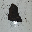

In [32]:
img

In [31]:
### (32, 32)픽셀로 읽어 들이는데 19분
### 픽셀값 변경을 원할떄만 실행시키며 그렇지 않은 경우 아래의 joblib을 이용하여 가져올 것, 실행시간: 5초 이하
img_list=np.array([])
label_list=[]
for i in os.listdir(path):
    print("Progressing...")
    for j in os.listdir(os.path.join(path, i)):
        img = keras.utils.load_img(os.path.join(path, i, j), target_size=(32, 32))
        print("Read\n", img)
        img = np.float32(img)
        print("Float\n",img)
        img = img/255.0
        print("Divide",img)
        img_list = np.append(img_list, img)
        label_list.append(i)
img_list = np.reshape(img_list,(-3, 32, 32, 3))

Progressing...


KeyboardInterrupt: 

In [26]:
img_list = np.reshape(img_list, (-1, 32, 32, 3))

In [27]:
img_list[0]

array([[[0.49019608, 0.42745098, 0.3764706 ],
        [0.48235294, 0.41960785, 0.36862746],
        [0.49019608, 0.43921569, 0.3764706 ],
        ...,
        [0.47843137, 0.42745098, 0.36078432],
        [0.48235294, 0.43137255, 0.36470589],
        [0.47058824, 0.42745098, 0.35686275]],

       [[0.49019608, 0.43529412, 0.38431373],
        [0.48627451, 0.44705883, 0.40784314],
        [0.53333336, 0.50588238, 0.47450981],
        ...,
        [0.63529414, 0.64313728, 0.63921571],
        [0.67058825, 0.67843139, 0.66666669],
        [0.66274512, 0.67058825, 0.65882355]],

       [[0.68235296, 0.68627453, 0.69411767],
        [0.69411767, 0.69803923, 0.70588237],
        [0.68235296, 0.69803923, 0.7019608 ],
        ...,
        [0.67843139, 0.68627453, 0.68235296],
        [0.67450982, 0.68235296, 0.67058825],
        [0.67450982, 0.68235296, 0.67058825]],

       ...,

       [[0.65490198, 0.67058825, 0.67450982],
        [0.65882355, 0.67450982, 0.67843139],
        [0.66666669, 0

In [49]:
joblib.dump(img_list, "img_array32_float.pkl")

['img_array32_float.pkl']

In [48]:
img_list = np.float64(img_list)
img_list = img_list/255.0
label_list = np.array(label_list).astype("int16")